<center><h1>  A Fuzzy Logic System for diagnosing a patient's mental health condition based on their behavior, speech, and medical history </h1></center>

## Import Libraries

In [1]:
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import numpy as np
import matplotlib
import pickle
import matplotlib.pyplot as plt


%matplotlib inline

## Define the input variables

In [2]:
behavior = ctrl.Antecedent(np.arange(0, 101, 1), 'Behavior')
speech = ctrl.Antecedent(np.arange(0, 101, 1), 'Speech')
medical_history = ctrl.Antecedent(np.arange(0, 101, 1), 'Medical History')

## Define output variables

In [3]:
mental_health_condition = ctrl.Consequent(np.arange(0, 101, 1), 'Mental Health Condition')

## Define the membership functions for behavior

c:\ProgramData\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


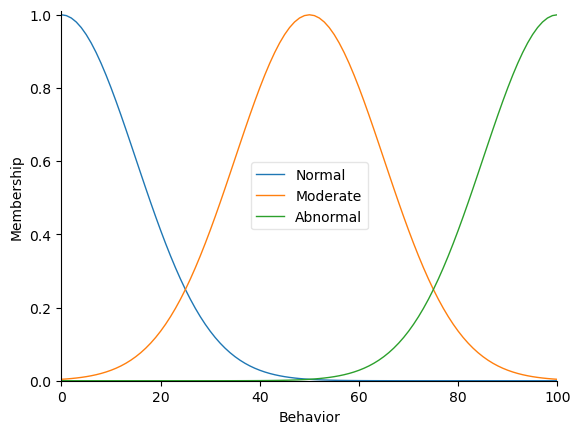

In [4]:
behavior['Normal'] = fuzz.gaussmf(behavior.universe , 0 , 15)
behavior['Moderate'] = fuzz.gaussmf(behavior.universe , 50, 15)
behavior['Abnormal'] = fuzz.gaussmf(behavior.universe , 100, 15)
behavior.view()

## Define the membership functions for speech

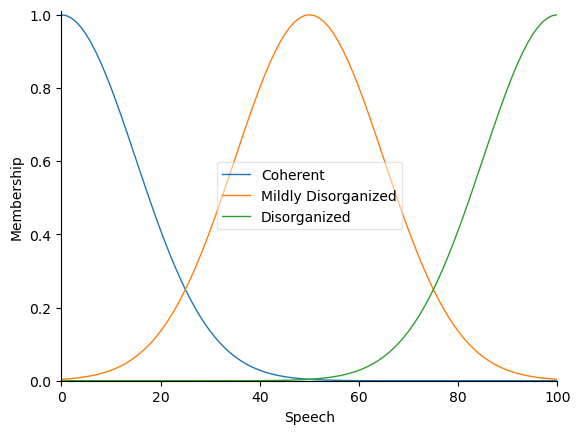

In [5]:
speech['Coherent'] = fuzz.gaussmf(speech.universe, 0, 15)
speech['Mildly Disorganized'] = fuzz.gaussmf(speech.universe, 50, 15)
speech['Disorganized'] =  fuzz.gaussmf(speech.universe, 100, 15)
speech.view()

## Define the membership functions for medical history

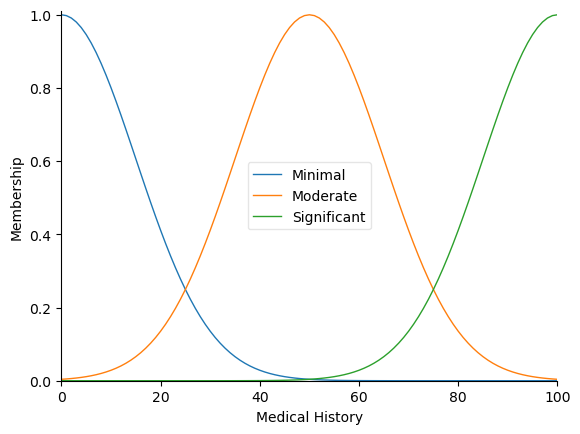

In [6]:
medical_history['Minimal'] = fuzz.gaussmf(medical_history.universe, 0, 15)
medical_history['Moderate'] = fuzz.gaussmf(medical_history.universe, 50, 15)
medical_history['Significant'] = fuzz.gaussmf(medical_history.universe, 100, 15)
medical_history.view()

## Define the membership functions for the output variable

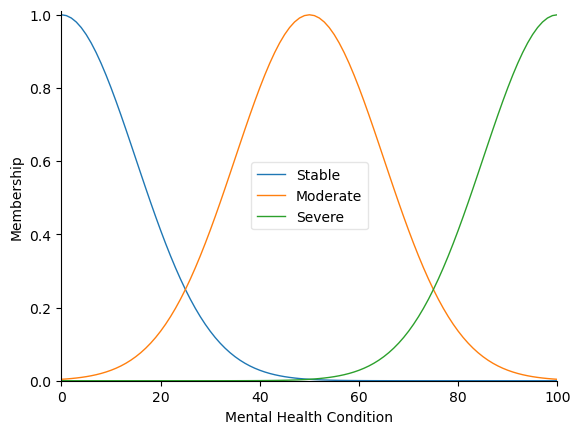

In [7]:
mental_health_condition['Stable'] = fuzz.gaussmf(mental_health_condition.universe, 0, 15)
mental_health_condition['Moderate'] = fuzz.gaussmf(mental_health_condition.universe, 50, 15)
mental_health_condition['Severe'] = fuzz.gaussmf(mental_health_condition.universe, 100, 15)
mental_health_condition.view()

## Define the rules

Fuzzy Rules:

If Behavior is Normal and Speech is Coherent and Medical History is Minimal, then Mental Health Condition is Stable.

If Behavior is Abnormal or Speech is Disorganized, then Mental Health Condition is Severe.

If Medical History is Significant and (Behavior is Moderate or Speech is Mildly Disorganized), then Mental Health Condition is Severe.

If Behavior is Moderate and Speech is Mildly Disorganized and Medical History is Moderate, then Mental Health Condition is Moderate.

If Behavior is Normal and (Speech is Coherent or Medical History is Minimal), then Mental Health Condition is Stable.

(<Figure size 640x480 with 1 Axes>, <Axes: >)

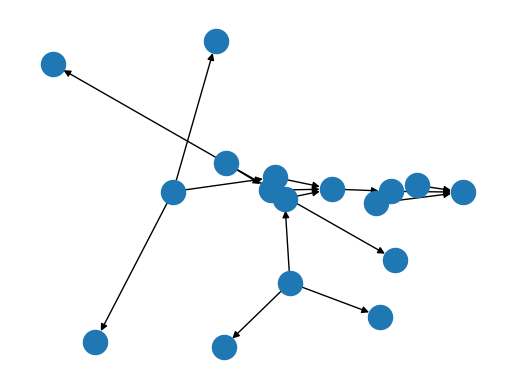

In [8]:
rule1 = ctrl.Rule(behavior["Normal"] & speech["Coherent"] & medical_history["Minimal"], mental_health_condition["Stable"])
rule2 = ctrl.Rule((behavior["Abnormal"] | speech["Disorganized"]), mental_health_condition["Severe"])
rule3 = ctrl.Rule(medical_history["Significant"] & (behavior["Moderate"] | speech["Mildly Disorganized"]), mental_health_condition["Severe"])
rule4 = ctrl.Rule(behavior["Moderate"] & speech["Mildly Disorganized"] & medical_history["Moderate"], mental_health_condition["Moderate"])
rule5 = ctrl.Rule(behavior["Normal"] & (speech["Coherent"] | medical_history["Minimal"]), mental_health_condition["Stable"])

rule5.view()

## Create the control system

In [9]:
mental_health_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5])
mental_health_diagnosis = ctrl.ControlSystemSimulation(mental_health_ctrl)

## Pass the input values to the control system

In [10]:
mental_health_diagnosis.input['Behavior'] = 10
mental_health_diagnosis.input['Speech'] = 10
mental_health_diagnosis.input['Medical History'] = 10

# Compute the output value
mental_health_diagnosis.compute()

## Categorize the result

In [11]:
def diagnose_mental_health(diagnosis):
    if diagnosis <= 33:
        print('Diagnosis: Stable')
        return "Stable"
    elif diagnosis <= 66:
        print('Diagnosis: Moderate')
        return "Moderate"
    else:
        print('Diagnosis: Severe')
        return "Severe"

In [12]:
mental_health_diagnosis.output['Mental Health Condition']

16.84687671674746

In [13]:
print('Mental Health Condition Crisp Number:', mental_health_diagnosis.output['Mental Health Condition'])

Mental Health Condition Crisp Number: 16.84687671674746


## Visualize the results

Mental Health Condition Crisp Number: 16.84687671674746
Diagnosis: Stable


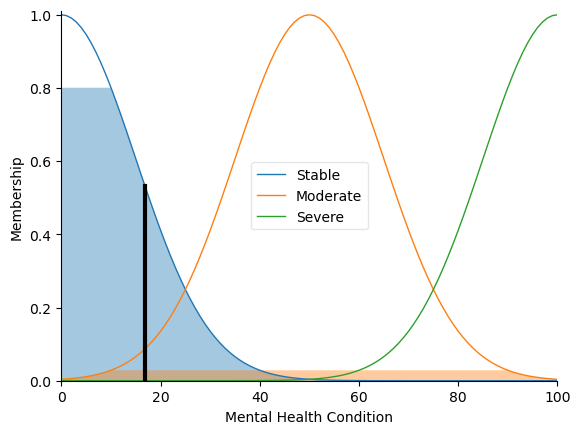

In [14]:
print('Mental Health Condition Crisp Number:', mental_health_diagnosis.output['Mental Health Condition'])
diagnose_mental_health(mental_health_diagnosis.output['Mental Health Condition'])
mental_health_condition.view(sim=mental_health_diagnosis)

## Save the fuzzy system to a file

In [15]:
# Save the fuzzy system to a file
with open('mental_health_diagnosis.pickle', 'wb') as f:
    pickle.dump(mental_health_ctrl, f)

In [16]:
with open('mental_health_diagnosis.pickle', 'rb') as f:
    mental_health_ctrl = pickle.load(f)

def run_fuzzy_system(behavior, speech, medical_history):
    mental_health_diagnosis = ctrl.ControlSystemSimulation(mental_health_ctrl)
    mental_health_diagnosis.input["Behavior"] = behavior
    mental_health_diagnosis.input["Speech"] = speech
    mental_health_diagnosis.input["Medical History"] = medical_history
    mental_health_diagnosis.compute()

    crisp_values = mental_health_diagnosis.output["Mental Health Condition"]
    return diagnose_mental_health(crisp_values)

In [17]:
run_fuzzy_system(10,10,10)

Diagnosis: Stable


'Stable'